# Plots y visualizacion de los datos

In [2]:
%config IPCompleter.greedy=True

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("/Users/Rudy/Documents/Github/python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt")

In [4]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
%matplotlib inline

#para guardar la imagen del plot
#savefig("path_donde_guardar_im")

# Scatter Plot (Nuve de puntos)

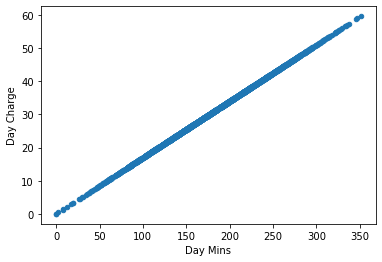

In [8]:
data.plot(kind = "scatter", x = "Day Mins", y = "Day Charge")

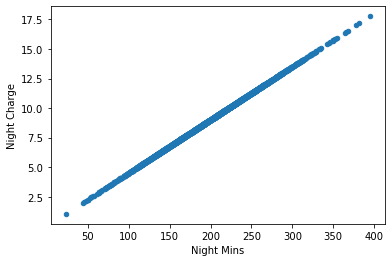

In [9]:
data.plot(kind = "scatter", x = "Night Mins", y = "Night Charge")

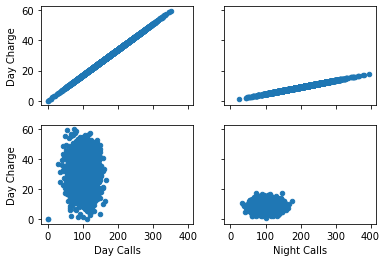

In [15]:
figure, axs = plt.subplots(2, 2, sharey = True, sharex = True)
data.plot(kind = "scatter", x = "Day Mins", y = "Day Charge", ax = axs[0][0])  #Grafico de arriba a la izquierda
data.plot(kind = "scatter", x = "Night Mins", y = "Night Charge", ax = axs[0][1])  #Arriba a la derecha
data.plot(kind = "scatter", x = "Day Calls", y = "Day Charge", ax = axs[1][0])
data.plot(kind = "scatter", x = "Night Calls", y = "Night Charge", ax = axs[1][1])

# Histogramas de frecuencias

Text(0.5, 1.0, 'Histograma de numero de llamdas al dia')

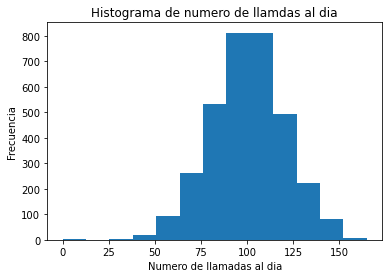

In [21]:
k = int(np.ceil(1 + np.log2(3333)))
plt.hist(data["Day Calls"], bins = k)
plt.xlabel("Numero de llamadas al dia")
plt.ylabel("Frecuencia")
plt.title("Histograma de numero de llamdas al dia")
#bins = numero de divisiones para tu histograma, puede ser un numero entero o una lista de numeros enteros
#Segun la regla de sturges en estadistica, para saber el numero de divisiones en un histograma:
# c = 1 + log2(M), donde M es el tamaño de la muestra
#np.ceil -- Es para redondear hacia arriba, tambien hacemos un int, porque el resultado es 13.0
#np.log2 -- Logaritmo base 2

# Boxplot, diagrama de caja y bigotes

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

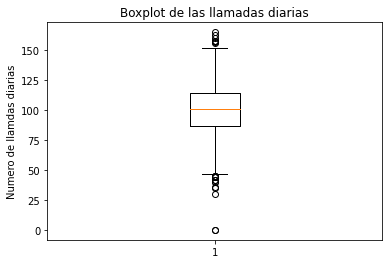

In [7]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Numero de llamdas diarias")
plt.title("Boxplot de las llamadas diarias")
#La caja indica donde esta la mayoria de los datos
#el inicio de la caja empieza en el 25%, despues de ser ordenados los datos
#El borde superior de la caja define el 75%
#La linea amarilla indica el punto de la mediana
#al el 25%, 50% y 75% se le llaman cuartiles

In [8]:
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [11]:
#El rango intercuartilico es la altura de la caja
#Se calcula con la diferencia del 75% y el 25%
IQR = data["Day Calls"].quantile(0.75) - data["Day Calls"].quantile(0.25)
IQR

27.0

In [12]:
#Ubicacion del bigote inferior
data["Day Calls"].quantile(0.25) - 1.5 * IQR

46.5

In [13]:
#Ubicacion del bigote superior
data["Day Calls"].quantile(0.75) + 1.5 * IQR

154.5